In [72]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('BananaByte_Employee_Salary_090923 2.csv')

In [29]:
df

,Employee_ID,Gender,Years_Exp,Years_Seniority,Edu_Level,Perf,Job_Role,Job_Family,Job_Level,Job_Location,Market_Median,Salary,Bonus_FY,Total_Compensation
0,269715XN,Male,17.9,0.8,masters,NaN,Chief Executive Officer,Leadership,Executive-Level,"San Francisco, CA",4185017.85,2449867.7,1225000.2,3674866.5
1,11324975,Female,25.0,22.9,doctorate,NaN,Chief Operating Officer,Leadership,Executive-Level,"San Francisco, CA",1082084.12,742964.8,372500.9,1115464.0
2,35645BZB,Female,20.4,11.8,doctorate,NaN,Chief Financial Officer,Leadership,Executive-Level,"San Francisco, CA",1182923.43,514671.4,257500.9,772171.1
3,783731F7,Male,23.3,4.1,doctorate,NaN,Chief Information Officer,Leadership,Executive-Level,"San Francisco, CA",1006076.76,509194.7,255000.9,764194.6
4,34718QIA,Female,19.0,1.7,doctorate,NaN,Vice Presidents,Leadership,Executive-Level,"San Francisco, CA",639996.89,398064.6,200000.3,598063.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11509,61526BHG,Female,1.3,0.4,bachelors,5.5,Customer Service Representative,Customer Service,Entry-Level,"Seattle, WA",59161.68,30462.0,2500.1,32961.4
11510,86936YDN,Male,1.1,0.5,bachelors,4.5,Customer Service Representative,Customer Service,Entry-Level,"Boston, MA",63043.68,30182.4,2500.1,32682.0
11511,32487P5K,Male,3.4,0.3,high school,3.4,Customer Service Representative,Customer Service,Entry-Level,"Boston, MA",63043.68,30164.9,2500.0,32663.8
11512,201982LK,Male,1.6,0.1,high school,2.3,Customer Service Representative,Customer Service,Entry-Level,"San Francisco, CA",76203.66,29785.4,2500.5,32285.6


In [30]:

pd.read_csv('BananaByte_Employee_Salary_090923 2.csv',dtype={'target':int}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11514 entries, 0 to 11513
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee_ID         11514 non-null  object 
 1   Gender              11514 non-null  object 
 2   Years_Exp           11514 non-null  float64
 3   Years_Seniority     11514 non-null  float64
 4   Edu_Level           11514 non-null  object 
 5   Perf                11495 non-null  float64
 6   Job_Role            11514 non-null  object 
 7   Job_Family          11514 non-null  object 
 8   Job_Level           11514 non-null  object 
 9   Job_Location        11514 non-null  object 
 10  Market_Median       11514 non-null  float64
 11  Salary              11514 non-null  float64
 12  Bonus_FY            11514 non-null  float64
 13  Total_Compensation  11514 non-null  float64
dtypes: float64(7), object(7)
memory usage: 1.2+ MB


In [31]:
dfs=pd.read_csv('BananaByte_Employee_Salary_090923 2.csv',usecols=['Gender','Years_Exp','Edu_Level','Job_Role','Job_Level','Job_Location','Salary'])

In [32]:
dfs

,Gender,Years_Exp,Edu_Level,Job_Role,Job_Level,Job_Location,Salary
0,Male,17.9,masters,Chief Executive Officer,Executive-Level,"San Francisco, CA",2449867.7
1,Female,25.0,doctorate,Chief Operating Officer,Executive-Level,"San Francisco, CA",742964.8
2,Female,20.4,doctorate,Chief Financial Officer,Executive-Level,"San Francisco, CA",514671.4
3,Male,23.3,doctorate,Chief Information Officer,Executive-Level,"San Francisco, CA",509194.7
4,Female,19.0,doctorate,Vice Presidents,Executive-Level,"San Francisco, CA",398064.6
...,...,...,...,...,...,...,...
11509,Female,1.3,bachelors,Customer Service Representative,Entry-Level,"Seattle, WA",30462.0
11510,Male,1.1,bachelors,Customer Service Representative,Entry-Level,"Boston, MA",30182.4
11511,Male,3.4,high school,Customer Service Representative,Entry-Level,"Boston, MA",30164.9
11512,Male,1.6,high school,Customer Service Representative,Entry-Level,"San Francisco, CA",29785.4


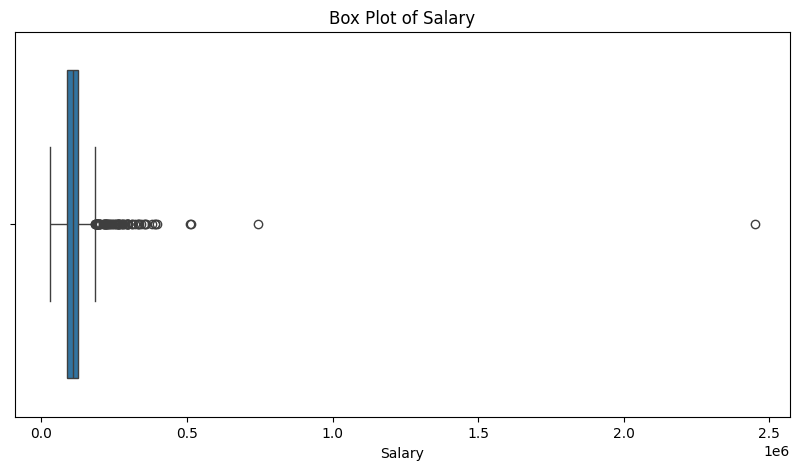

In [33]:
feature = 'Salary'
plt.figure(figsize=(10, 5))
sns.boxplot(x=dfs[feature])
plt.title(f'Box Plot of {feature}')
plt.show()


In [34]:
Q1 = dfs['Salary'].quantile(0.25)
Q3 = dfs['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
dfs_cleaned = dfs[(dfs['Salary'] >= lower_bound) & (dfs['Salary'] <= upper_bound)]

print("Original shape:", dfs.shape)
print("After removing outliers:", dfs_cleaned.shape)

Original shape: (11514, 7)
After removing outliers: (11433, 7)


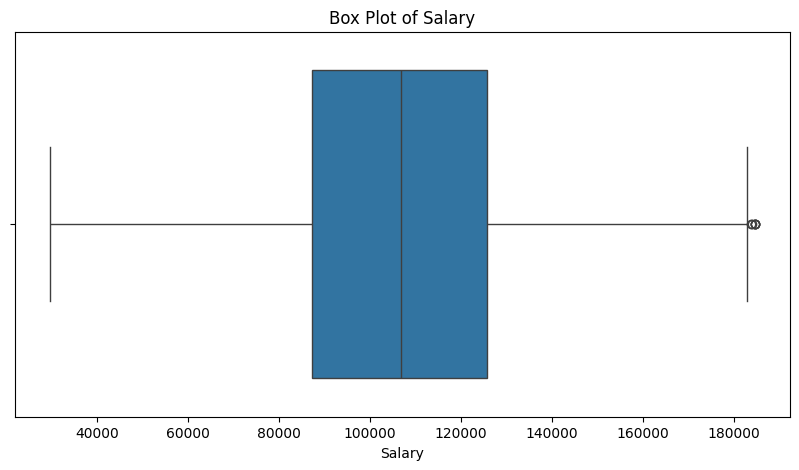

In [35]:
feature = 'Salary'
plt.figure(figsize=(10, 5))
sns.boxplot(x=dfs_cleaned[feature])
plt.title(f'Box Plot of {feature}')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

X = dfs_cleaned.drop('Salary', axis=1)
y = dfs_cleaned['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


X_train.shape, X_test.shape

((8003, 6), (3430, 6))

In [37]:
X_train


,Gender,Years_Exp,Edu_Level,Job_Role,Job_Level,Job_Location
2178,Male,8.9,doctorate,Project Manager,Senior-Level,"San Francisco, CA"
9031,Female,3.5,masters,IT Specialist,Mid-Level,"Seattle, WA"
872,Female,9.0,bachelors,Product Manager,Senior-Level,"San Francisco, CA"
577,Female,6.3,doctorate,Senior Software Engineer,Senior-Level,"Seattle, WA"
4283,Female,9.1,doctorate,Network Engineer,Senior-Level,"San Francisco, CA"
...,...,...,...,...,...,...
4940,Male,12.4,bachelors,Senior Software Engineer,Senior-Level,"Atlanta, GA"
3345,Female,4.0,masters,Software Engineer,Mid-Level,"San Francisco, CA"
9926,Female,3.1,masters,IT Specialist,Mid-Level,"Chicago, IL"
10880,Male,7.6,bachelors,Graphic Designer,Mid-Level,"San Francisco, CA"


In [38]:
X_test

,Gender,Years_Exp,Edu_Level,Job_Role,Job_Level,Job_Location
10388,Female,5.2,masters,Sales Representative,Mid-Level,"San Francisco, CA"
6056,Female,7.9,bachelors,Software Engineer,Mid-Level,"Los Angeles, CA"
6014,Male,4.0,masters,Scrum Master,Mid-Level,"Boston, MA"
1548,Male,10.6,doctorate,Senior Software Engineer,Senior-Level,"San Francisco, CA"
6941,Male,6.3,masters,Software Engineer,Mid-Level,"Chicago, IL"
...,...,...,...,...,...,...
11505,Male,1.7,bachelors,Customer Service Representative,Entry-Level,"San Francisco, CA"
2652,Male,12.5,doctorate,DevOps Engineers,Senior-Level,"Austin, TX"
4426,Male,11.8,doctorate,Senior Software Engineer,Senior-Level,"Dallas, TX"
1167,Male,9.7,bachelors,Product Manager,Senior-Level,"Chicago, IL"


In [39]:
y_train

2178     130229.6
9031      84887.1
872      152264.6
577      161697.8
4283     115450.1
           ...   
4940     109582.6
3345     123661.7
9926      73960.5
10880     52316.2
2813     123868.5
Name: Salary, Length: 8003, dtype: float64

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Columns
categorical_features = ['Gender', 'Job_Role', 'Job_Location', 'Edu_Level', 'Job_Level']
numeric_features = ['Years_Exp']

# Pipelines
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='error') )
])

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Create and fit the Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=0))
])
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

# Fit and transform training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [125]:
print(dfs.isnull().sum())

Gender          0
Years_Exp       0
Edu_Level       0
Job_Role        0
Job_Level       0
Job_Location    0
Salary          0
dtype: int64


In [126]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

# Use 5-fold cross-validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models using cross-validation
for name, model in models.items():
    mae_scores = -cross_val_score(model, X_train_transformed, y_train, cv=kf, scoring='neg_mean_absolute_error')
    mse_scores = -cross_val_score(model, X_train_transformed, y_train, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_train_transformed, y_train, cv=kf, scoring='r2')

    avg_mae = mae_scores.mean()
    avg_mse = mse_scores.mean()
    avg_rmse = np.sqrt(avg_mse)
    avg_r2 = r2_scores.mean()

    # Fit once for MAPE accuracy (MAPE is not directly supported by cross_val_score)
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    accuracy = 100 - mape * 100

    print(f"\n{name}")
    print(f"Cross-Validated MAE: {avg_mae:.2f}")
    print(f"Cross-Validated MSE: {avg_mse:.2f}")
    print(f"Cross-Validated RMSE: {avg_rmse:.2f}")
    print(f"Cross-Validated R² Score: {avg_r2:.2f}")
    print(f"Accuracy (based on MAPE): {accuracy:.2f}%")



Linear Regression
Cross-Validated MAE: 9835.45
Cross-Validated MSE: 140207654.42
Cross-Validated RMSE: 11840.93
Cross-Validated R² Score: 0.84
Accuracy (based on MAPE): 90.20%

Ridge Regression
Cross-Validated MAE: 9836.00
Cross-Validated MSE: 140257623.32
Cross-Validated RMSE: 11843.04
Cross-Validated R² Score: 0.84
Accuracy (based on MAPE): 90.19%

Decision Tree
Cross-Validated MAE: 12622.97
Cross-Validated MSE: 255288830.89
Cross-Validated RMSE: 15977.76
Cross-Validated R² Score: 0.71
Accuracy (based on MAPE): 87.66%

Random Forest
Cross-Validated MAE: 10418.01
Cross-Validated MSE: 167595987.82
Cross-Validated RMSE: 12945.89
Cross-Validated R² Score: 0.81
Accuracy (based on MAPE): 89.78%

Polynomial Regression (Degree 2)
Cross-Validated MAE: 9959.99
Cross-Validated MSE: 147816329.62
Cross-Validated RMSE: 12157.97
Cross-Validated R² Score: 0.83
Accuracy (based on MAPE): 90.38%


In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Predict using the finalized pipeline
final_predictions = rf_pipeline.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, final_predictions)
mse = mean_squared_error(y_test, final_predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)
accuracy = 100 - (mape * 100)

# Print results
print("\n--- Final Random Forest Model Evaluation ---")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Accuracy (based on MAPE): {accuracy:.2f}%")



--- Final Random Forest Model Evaluation ---
MAE: 10540.40
MSE: 168282621.75
RMSE: 12972.38
R² Score: 0.80
Accuracy (based on MAPE): 89.78%


In [132]:
# New input
new_input = pd.DataFrame([{
    'Years_Exp': 5,
    'Gender': 'Female',
    'Job_Role': 'Software Engineer',
    'Job_Location': 'San Francisco, CA',
    'Edu_Level': 'masters',
    'Job_Level': 'Mid-Level'
}])

# Transform and predict
new_input_transformed = preprocessor.transform(new_input)
predicted_salary = final_model.predict(new_input_transformed)

print(f"\nPredicted Salary for New Input: ${predicted_salary[0]:,.2f}")



Predicted Salary for New Input: $116,383.66


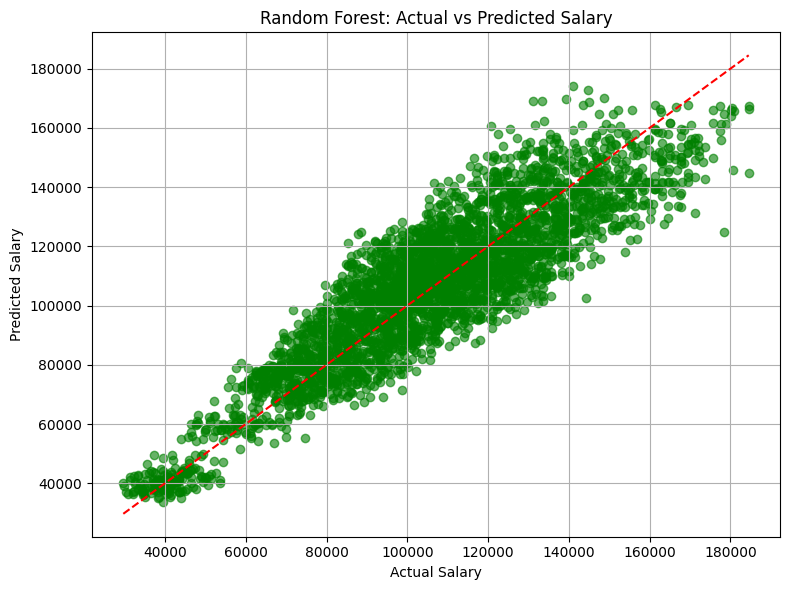

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_predictions, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest: Actual vs Predicted Salary")
plt.grid(True)
plt.tight_layout()
plt.show()


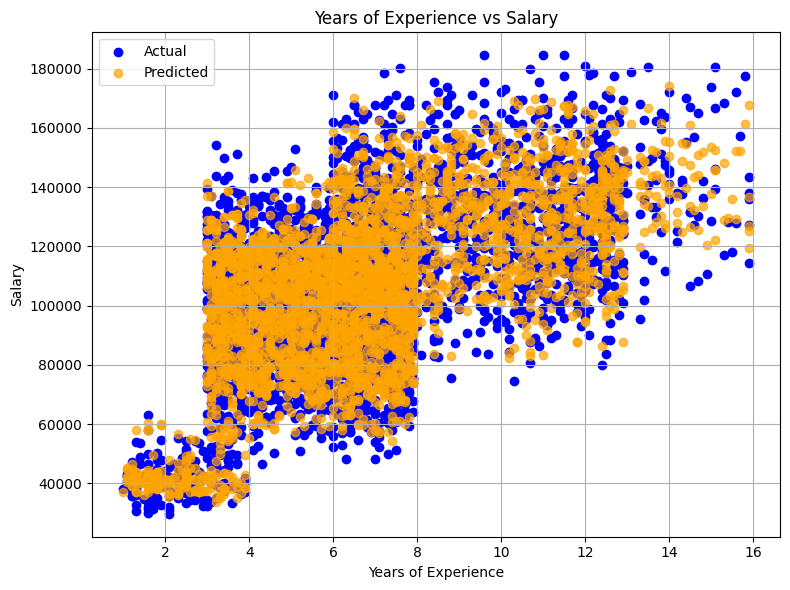

In [112]:
# Get original years of experience (not transformed) and predictions
df_plot = X_test.copy()
df_plot['Predicted_Salary'] = final_predictions
df_plot['Actual_Salary'] = y_test.values

plt.figure(figsize=(8,6))
plt.scatter(df_plot['Years_Exp'], df_plot['Actual_Salary'], color='blue', label='Actual')
plt.scatter(df_plot['Years_Exp'], df_plot['Predicted_Salary'], color='orange', label='Predicted', alpha=0.7)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [134]:
import joblib
joblib.dump(rf_pipeline, 'salary_prediction_model.pkl')


['salary_prediction_model.pkl']

In [139]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained pipeline
model = joblib.load("salary_prediction_model.pkl")

# Streamlit page setup
st.set_page_config(page_title="Salary Predictor", page_icon="💼", layout="centered")
st.title("💼 Salary Prediction App")
st.markdown("Predict your estimated salary based on job and personal details.")

# Sidebar inputs
st.sidebar.header("Enter Details")

# Dropdowns and input fields
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])

years_exp = st.sidebar.number_input("Years of Experience", min_value=0.0, max_value=50.0, value=3.0, step=0.5)

edu_level = st.sidebar.selectbox("Education Level", [
    'bachelors', 'doctorate', 'high school', 'masters'
])

job_role = st.sidebar.selectbox("Job Role", [
    'AI Specialist', 'Accountant', 'Administrative Assistant', 'Auditor', 'Backend Developer',
    'Budget Analyst', 'Business Analyst', 'Business Development Representative',
    'Chief Executive Officer', 'Chief Financial Officer', 'Chief Information Officer',
    'Chief Operating Officer', 'Customer Service Representative', 'Customer Success Manager',
    'Cybersecurity Analyst', 'Data Analyst', 'Data Engineer', 'Data Scientist',
    'Database Administrator', 'DevOps Engineers', 'Digital Marketing Specialist', 'Director',
    'Executive Assistant', 'Financial Analyst', 'Financial Controller', 'Frontend Developer',
    'Graphic Designer', 'HR Specialist', 'Human Resources Business Partner',
    'Human Resources Manager', 'IT Specialist', 'Infrastructure Engineer',
    'Learning and Development Specialist', 'Legal Counsel', 'Machine Learning Engineer',
    'Marketing Manager', 'Marketing Specialist', 'Mobile Application Developer',
    'Network Engineer', 'Office Manager', 'Paralegal', 'Product Manager', 'Product Owner',
    'Project Manager', 'Quality Assurance Engineer', 'Sales Manager', 'Sales Representative',
    'Scrum Master', 'Senior Accountant', 'Senior Project Manager', 'Senior Software Engineer',
    'Social Media Manager', 'Software Architect', 'Software Engineer', 'System Administrator',
    'Talent Acquisition Specialist', 'Technical Writer', 'Tester', 'UX/UI Designer', 'Vice Presidents'
])

job_level = st.sidebar.selectbox("Job Level", [
    'Entry-Level', 'Executive-Level', 'Management-Level', 'Mid-Level', 'Senior-Level'
])

job_location = st.sidebar.selectbox("Job Location", [
    'Atlanta, GA', 'Austin, TX', 'Boston, MA', 'Chicago, IL', 'Dallas, TX',
    'Denver, CO', 'Los Angeles, CA', 'New York, NY', 'San Francisco, CA', 'Seattle, WA'
])

# Prepare input DataFrame
input_df = pd.DataFrame({
    'Gender': [gender],
    'Years_Exp': [years_exp],
    'Edu_Level': [edu_level],
    'Job_Role': [job_role],
    'Job_Level': [job_level],
    'Job_Location': [job_location]
})

st.write("### 📝 Entered Details")
st.dataframe(input_df)

# Predict salary
if st.button("💰 Predict Salary"):
    prediction = model.predict(input_df)
    st.success(f"✅ Estimated Salary: ${prediction[0]:,.2f}")



Writing app.py


In [140]:
!pip install streamlit pyngrok

In [144]:
!ngrok authtoken 30EgtoWCv3rzDJEpemfNaUZiR6Q_29rQgFr8fwZ3CVW252VKT

Authtoken saved to configuration file: /Users/chiragdua/Library/Application Support/ngrok/ngrok.yml 
